In [145]:
# Nacteni knihoven
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Nacteni dat
df = pd.read_csv("df.csv")
df.head()

# Info k souboru
'''
Y je poměrem ceny a účetní hodnoty akcie
běžná likvidita (Current Ratio, CR)
zadluženost (Debt to Assets, DA)
finanční páka (Financial Leverage, FL)
provozní zisková marže (Operating Profit Margin, OPM)
obrat pohledávek (Receivables Turnover, RT)
obrat celkových aktiv (Total Assets Turnover, TAT)
'''

'\nY je poměrem ceny a účetní hodnoty akcie\nběžná likvidita (Current Ratio, CR)\nzadluženost (Debt to Assets, DA)\nfinanční páka (Financial Leverage, FL)\nprovozní zisková marže (Operating Profit Margin, OPM)\nobrat pohledávek (Receivables Turnover, RT)\nobrat celkových aktiv (Total Assets Turnover, TAT)\n'

In [146]:
df.boxplot()
# => odlehlá pozorování u RT (obrat pohledávak)

<Axes: >

In [147]:
df.describe()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.584900,0.306900,4.339400,0.203194,20.291200,0.736200,1.630100,11.896500,9.04180
std,0.986402,0.166786,5.303547,0.151455,57.688951,0.521228,2.852374,18.017399,11.82557
min,0.290000,0.000000,0.000000,-0.097000,0.000000,0.140000,0.000000,0.000000,0.00000
25%,1.047500,0.190000,1.902500,0.086600,5.725000,0.400000,0.407500,2.980000,4.16000
50%,1.270000,0.295000,2.940000,0.191800,8.380000,0.540000,0.710000,6.080000,5.95500
75%,1.735000,0.412500,4.482500,0.267975,14.442500,0.897500,1.550000,13.890000,8.85500
max,5.890000,0.710000,32.520000,0.752200,553.470000,3.240000,16.080000,109.240000,74.34000


In [148]:
# Graf pro každou proměnnou v modelu
variables = ["CR", "DA", "FL", "OPM", "RT", "TAT", "DE"]
for variable in variables:
    fig = sns.scatterplot(data=df, x=variable, y="Y") #.set(title=variable)

c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

In [149]:
fig

<Axes: xlabel='CR', ylabel='Y'>

In [150]:
# Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie

df_corr = df.drop(columns=["Company", "Sector"])
df_corr.corr()
# Největší vliv na indikátor Y (cena/uce hodnota) má proměnná FL (finanční páka) a DE (v zadání není uvedeno, co to je)

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


In [151]:
# Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()
# => p-hodnota je pro několik proměnných > 0,05 (hl. významnosti 95 %) - vyloučit z modelu proměnné CR, DA, RT, DE, PT; zbytek nechat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        11:02:50   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# S využitím modulu scipy vytvoř regresní model a zobraz si tabulku se souhrnem významů. 
# Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. 
# Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).
formula = "Y ~ FL + OPM + TAT"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        11:02:50   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. 
# Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší 
# (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

df["Predicted_Y"] = res.predict(df)
df["Predicted_Y_2"] = res.fittedvalues # Jaký je rozdíl mezi .predict() a .fittedvalues?
df["Residuals"] = - res.resid
# df["Residuals_2"] = df["Predicted_Y"] - df["Y"]

df_sorted_diff = df.sort_values(by=["Residuals"], ascending=False)
df_sorted_diff.head()

# Největší rozdíl mezi predikovanou a skutečnou cenou je u "SYXLy" (řadek 79), skutečné Y 6.97, odhadovné Y 41.78, rozdíl 34.81.

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Predicted_Y,Predicted_Y_2,Residuals
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,Industrials,41.779545,41.779545,34.809545
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,64.848968,64.848968,23.278968
6,6qLRA,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,Industrials,25.910015,25.910015,22.850015
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,23.356512,16.096512
56,n2wGj,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,Consumer Defensive,26.676012,26.676012,15.376012


c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ondre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


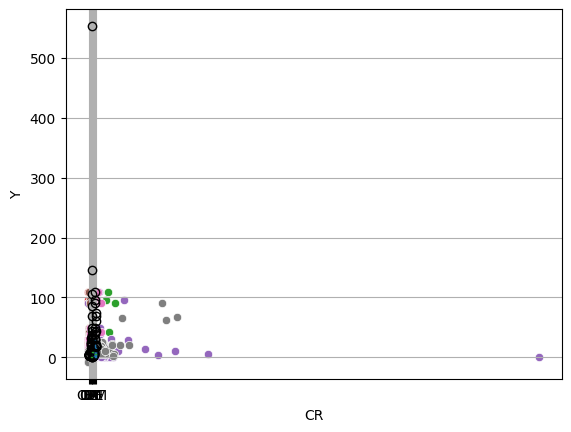

In [154]:
sns.scatterplot(data=df, x="Y", y="Predicted_Y")
plt.show()

In [155]:
# Bonus 1:
# Sestav model s využitím robustní regrese. Opět proveď vyřazení koeficinetů, které nejsou statisticky významné, 
# a sestav model pouze s významnými koeficienty. Vlož odhady cen do původních dat a opět najdi potenciálně nejvíce 
# podhodnocenou akcii. Jde v případě robustní regese o stejnou akcii, nebo se akcie liší?

formula_2 = "Predicted_Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod_2 = smf.rlm(formula=formula_2, data=df)
res_2 = mod_2.fit()
res_2.summary()

# => p-hodnota je pro jednu proměnnou > 0,05 (hl. významnosti 95 %) - vyloučit z modelu proměnnou DE; zbytek nechat

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            Predicted_Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       91
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 05 Nov 2023                                         
Time:                        11:02:50                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188   7.63e-15  -1.37e+15      0.000     -10.419     -10.419
CR          3.081e-15   1.77e-15      1.742      0.082   -3.86e-16    6.55e-15
DA          5.596e-14   1.34e-14      4.185      0.000    2.97e-14    8.22e-14
FL             2.5281   1.51e-15   1.67e+15      0.000       2.528       2.528
OPM           24.8478   1.15e-14   2.16e+15      0.000      24.848      24.848
RT         -1.228e-15   2.99e-17    -41.044      0.000   -1.29e-15   -1.17e-15
TAT            8.5518   3.35e-15   2.55e+15      0.000       8.552       8.552
DE         -1.776e-15   2.95e-15     -0.602      0.547   -7.56e-15       4e-15
PT          8.743e-16   1.37e-16      6.366      0.000    6.05e-16    1.14e-15
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [156]:
formula_2 = "Predicted_Y ~ CR + DA + FL + OPM + RT + TAT + PT"
mod_2 = smf.rlm(formula=formula_2, data=df)
res_2 = mod_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            Predicted_Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       92
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 05 Nov 2023                                         
Time:                        11:02:50                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188   7.19e-15  -1.45e+15      0.000     -10.419     -10.419
CR         -3.386e-15   2.02e-15     -1.674      0.094   -7.35e-15    5.79e-16
DA          1.688e-14   1.27e-14      1.328      0.184   -8.03e-15    4.18e-14
FL             2.5281   3.87e-16   6.53e+15      0.000       2.528       2.528
OPM           24.8478   1.33e-14   1.87e+15      0.000      24.848      24.848
RT          4.649e-16    3.5e-17     13.298      0.000    3.96e-16    5.33e-16
TAT            8.5518   3.91e-15   2.18e+15      0.000       8.552       8.552
PT         -1.367e-15   1.58e-16     -8.635      0.000   -1.68e-15   -1.06e-15
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [157]:
df["Predicted_Robust_Y"] = res_2.predict(df)
df["Residuals_Robust"] = - res_2.resid
df["Residuals_2"] = df["Predicted_Robust_Y"] - df["Y"]

df_sorted_diff = df.sort_values(by=["Residuals"], ascending=False)
df_sorted_diff.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Predicted_Y,Predicted_Y_2,Residuals,Predicted_Robust_Y,Residuals_Robust,Residuals_2
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,Industrials,41.779545,41.779545,34.809545,41.779545,2.131628e-14,34.809545
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,64.848968,64.848968,23.278968,64.848968,1.421085e-14,23.278968
6,6qLRA,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,Industrials,25.910015,25.910015,22.850015,25.910015,1.421085e-14,22.850015
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,23.356512,16.096512,23.356512,-2.486900e-14,16.096512
56,n2wGj,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,Consumer Defensive,26.676012,26.676012,15.376012,26.676012,7.815970e-14,15.376012


In [158]:
# Bonus 2: 
# Použij původní (tedy "nerobustní") model a vyčísli Cookovu vzdálenost pro všechny hodnoty. 
# Vyřaď všechny akcie s Cookovou vzdáleností vyšší než 1 a přepočítej regresní model. 
# Nakonec opět najdi potenciálně nejvíce podhodnocenou akcii a podívej se, jestli jde o stejnou akcii jako u předchozích modelů.

influence = OLSInfluence(res)
df['Cook Distance'] = influence.cooks_distance[0] # 0 je pro Cookovu vzdálenost

df_sorted = df.sort_values(by=["Cook Distance"], ascending=False)
print(df_sorted.head())

# V tomto regresním modelu jsou jako vysvětlující proměnné FL, OPM, TAT
# Vzhledem k tomu, že (pokud to nemám špatně) Cookova vzdálenost není nikde >= 1, tak nemá smysl porovnávat s původním modelem, tohle by vyšlo stejně.

   Company    CR    DA     FL     OPM      RT   TAT     DE       Y     PT  \
45   jhFdg  1.09  0.48  24.70  0.1913   13.43  1.16  11.90  109.24   4.76   
75   QiwB1  1.23  0.53  21.39  0.1384   44.15  1.87  11.29   95.58   7.52   
98   YX515  2.30  0.64  25.03  0.3758    7.48  0.31  16.08   41.57  10.54   
79   SYXLy  0.76  0.37  18.64  0.0631   12.44  0.41   6.93    6.97   3.40   
56   n2wGj  1.00  0.14   3.37  0.0349  106.52  3.24   0.49   11.30  10.49   

                Sector  Predicted_Y  Predicted_Y_2  Residuals  \
45  Consumer Defensive    66.699306      66.699306 -42.540694   
75   Consumer Cyclical    63.088553      63.088553 -32.491447   
98          Technology    64.848968      64.848968  23.278968   
79         Industrials    41.779545      41.779545  34.809545   
56  Consumer Defensive    26.676012      26.676012  15.376012   

    Predicted_Robust_Y  Residuals_Robust  Residuals_2  Cook Distance  
45           66.699306      4.263256e-14   -42.540694       0.885894  
75  